In [0]:
#Importando as bibliotecas que serão utilizadas no notebook
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, DoubleType, IntegerType

In [0]:

#Criando um sessão so spark para carregar os dados CSV
spark = SparkSession.builder.appName("olist-analysis").getOrCreate()

In [0]:

#Definindo o path das camadas do Lakehouse
pathRaw = "dbfs:/FileStore/project/olist/raw"
pathBronze = "dbfs:/FileStore/project/olist/bronze"
pathSilver = "dbfs:/FileStore/project/olist/silver"
pathGold = "dbfs:/FileStore/project/olist/gold"

In [0]:
#Carrega os CSVs nos DataFrames

link_csv_customers = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_customers_dataset.csv"
link_csv_geolocation = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_geolocation_dataset.csv"
link_csv_order_items = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_order_items_dataset.csv"
link_csv_order_payments = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_order_payments_dataset.csv"
link_csv_order_reviews = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_order_reviews_dataset.csv"
link_csv_orders = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_orders_dataset.csv"
link_csv_products = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_products_dataset.csv"
link_csv_sellers = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/olist_sellers_dataset.csv"
link_csv_category = "https://raw.githubusercontent.com/olist/work-at-olist-data/master/datasets/product_category_name_translation.csv"

df_customers = (
            spark.createDataFrame(
            pd.read_csv(link_csv_customers)
            )
)

df_geolocation = (
                spark.createDataFrame(
                pd.read_csv(link_csv_geolocation)
                )
)

df_order_items = (
                spark.createDataFrame(
                pd.read_csv(link_csv_order_items)
                )
)

df_order_payments = (
                spark.createDataFrame(
                pd.read_csv(link_csv_order_payments)
                )
)

df_order_reviews = (
                spark.createDataFrame(
                pd.read_csv(link_csv_order_reviews)
                )
)

df_orders = (
                spark.createDataFrame(
                pd.read_csv(link_csv_orders)
                )
)

df_products = (
                spark.createDataFrame(
                pd.read_csv(link_csv_products)
                )
)

df_sellers = (
                spark.createDataFrame(
                pd.read_csv(link_csv_sellers)
                )
)

df_category = (
                spark.createDataFrame(
                pd.read_csv(link_csv_category)
                )
)

In [0]:
# Salva os CSVs na camada Raw
(
df_customers
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/customers/customers.csv")
)

(
df_geolocation
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/geolocation/geolocation.csv")
)

(
df_order_items
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/order_items/order_items.csv")
)

(
df_order_payments
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/order_payments/order_payments.csv")
)

(
df_order_reviews
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/order_reviews/order_reviews.csv")
)

(
df_orders
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/orders/orders.csv")
)

(
df_products
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/products/products.csv")
)

(
df_sellers
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/sellers/sellers.csv")
)

(
df_category
    .write
    .format("csv")
    .mode("overwrite")
    .save(f"{pathRaw}/category/category.csv")
)

In [0]:
#Definindo os schemas das tabelas para camada Bronze

customers_schema = (
                    StructType([
                        StructField("customerId", StringType(), True),
                        StructField("customerUniqueId", StringType(), True),
                        StructField("customerZipCodePrefix", StringType(), True),
                        StructField("customerCity", StringType(), True),
                        StructField("customerState", StringType(), True),
                                ])
)

geolocation_schema = (
                    StructType([
                        StructField("geolocationCodePrefix", StringType(), True),
                        StructField("geolocationLat", StringType(), True),
                        StructField("geolocationLng", StringType(), True),
                        StructField("geolocationCity", StringType(), True),
                        StructField("geolocationState", StringType(), True),
                    ])
)

order_items_schema = (
                    StructType([
                        StructField("orderId", StringType(), True),
                        StructField("orderItemId", StringType(), True),
                        StructField("productId", StringType(), True),
                        StructField("sellerId", StringType(), True),
                        StructField("shippingLimitDate", TimestampType(), True),
                        StructField("price", DoubleType(), True),
                        StructField("freightValue", DoubleType(), True),
                    ])
)

order_payments_schema = (
                    StructType([
                        StructField("orderId", StringType(), True),
                        StructField("paymentSequential", StringType(), True),
                        StructField("paymentType", StringType(), True),
                        StructField("paymentInstallments", StringType(), True),
                        StructField("paymentValue", DoubleType(), True),
                    ])
)

order_reviews_schema = (
                    StructType([
                        StructField("reviewId", StringType(), True),
                        StructField("orderId", StringType(), True),
                        StructField("reviewScore", StringType(), True),
                        StructField("reviewCommentTitle", StringType(), True),
                        StructField("reviewCommentMessage", IntegerType(), True),
                        StructField("reviewCreationDate", TimestampType(), True),
                        StructField("reviewAnswerTimestamp", TimestampType(), True),
                    ])
)

orders_schema = (
                    StructType([
                        StructField("orderId", StringType(), True),
                        StructField("customerId", StringType(), True),
                        StructField("orderStatus", StringType(), True),
                        StructField("orderPurchaseTimestamp", TimestampType(), True),
                        StructField("orderApprovedAt", TimestampType(), True),
                        StructField("orderDeliveredCarrierDate", TimestampType(), True),
                        StructField("orderDeliveredCustomerDate", TimestampType(), True),
                        StructField("orderEstimatedDeliveryDate", TimestampType(), True),
                    ])
)

products_schema = (
                    StructType([
                        StructField("productId", StringType(), True),
                        StructField("productCategoryName", StringType(), True),
                        StructField("productNameLenght", IntegerType(), True),
                        StructField("productDescriptionLenght", IntegerType(), True),
                        StructField("productPhotosQty", IntegerType(), True),
                        StructField("productWeight_g", IntegerType(), True),
                        StructField("productLength_cm", IntegerType(), True),
                        StructField("productHeight_cm", IntegerType(), True),
                        StructField("productWidth_cm", IntegerType(), True),
                    ])
)

sellers_schema = (
                    StructType([
                        StructField("sellerId", StringType(), True),
                        StructField("sellerCodePrefix", StringType(), True),
                        StructField("sellerCity", StringType(), True),
                        StructField("sellerState", StringType(), True),
                    ])
)

category_schema = (
                    StructType([
                        StructField("productCategory", StringType(), True),
                        StructField("productCategoryNameEnglish", StringType(), True),
                    ])
)

In [0]:
# Aplicando os Schemas e Carregando os dados na camada bronze

#Customers
df_customersBronze = (
    spark
    .read
    .format("csv")
    .schema(customers_schema)
    .load(f"{pathRaw}/customers/customers.csv")
    .withColumn("DataRawLoad", current_timestamp())
)

(
    df_customersBronze
    .write
    .format("delta")
    .mode("append")
    .save(f"{pathBronze}/customers")
)

#Geolocation
df_geolocationBronze = (
                spark
                .read
                .format("csv")
                .schema(geolocation_schema)
                .load(f"{pathRaw}/geolocation/geolocation.csv")
                .withColumn("DataRawLoad", current_timestamp())
)

(
    df_geolocationBronze
    .write
    .format("delta")
    .mode("append")
    .save(f"{pathBronze}/geolocation")
)

#Ordem_Items
df_order_itemsBronze = (
                spark
                .read
                .format("csv")
                .schema(order_items_schema)
                .load(f"{pathRaw}/order_items/order_items.csv")
                .withColumn("DataRawLoad", current_timestamp())
)

(
    df_order_itemsBronze
    .write
    .format("delta")
    .mode("append")
    .save(f"{pathBronze}/order_items")
)

#Order_payments
df_order_paymentsBronze = (
    spark
    .read
    .format("csv")
    .schema(order_payments_schema)
    .load(f"{pathRaw}/order_payments/order_payments.csv")
    .withColumn("DataRawLoad", current_timestamp())
)
(
    df_order_paymentsBronze
        .write
        .format("delta")
        .mode("append")
        .save(f"{pathBronze}/order_payments")
)

# Order_reviews
df_order_reviewsBronze = (
    spark
    .read
    .format("csv")
    .schema(order_reviews_schema)
    .load(f"{pathRaw}/order_reviews/order_reviews.csv")
    .withColumn("DataRawLoad", current_timestamp())
)
(
    df_order_reviewsBronze
        .write
        .format("delta")
        .mode("append")
        .save(f"{pathBronze}/order_reviews")
)

# Orders
df_ordersBronze = (
    spark
    .read
    .format("csv")
    .schema(orders_schema)
    .load(f"{pathRaw}/orders/orders.csv")
    .withColumn("DataRawLoad", current_timestamp())
)
(
    df_ordersBronze
        .write
        .format("delta")
        .mode("append")
        .save(f"{pathBronze}/orders")
)

# Products
df_productsBronze = (
    spark
    .read
    .format("csv")
    .schema(products_schema)
    .load(f"{pathRaw}/products/products.csv")
    .withColumn("DataRawLoad", current_timestamp())
)
(
    df_productsBronze
        .write
        .format("delta")
        .mode("append")
        .save(f"{pathBronze}/products")
)

# Sellers
df_sellersBronze = (
    spark
    .read
    .format("csv")
    .schema(sellers_schema)
    .load(f"{pathRaw}/sellers/sellers.csv")
    .withColumn("DataRawLoad", current_timestamp())
)
(
    df_sellersBronze
        .write
        .format("delta")
        .mode("append")
        .save(f"{pathBronze}/sellers")
)

# Category
df_categoryBronze = (
    spark
    .read
    .format("csv")
    .schema(category_schema)
    .load(f"{pathRaw}/category/category.csv")
    .withColumn("DataRawLoad", current_timestamp())
)
(
    df_categoryBronze
        .write
        .format("delta")
        .mode("append")
        .option("mergeSchema", "true")
        .save(f"{pathBronze}/category")
)
     

In [0]:
# Carregando dados na Camada Silver

#Customers data
customersSilver = (
    spark.sql(f'''
       SELECT
            customerId,
            customerUniqueId,
            customerZipCodePrefix,
            customerCity,
            customerState,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/customers`
          ) AS C
       WHERE
            C.rank = 1
       ''')
)
(
    customersSilver
     .write
     .format("delta")
     .mode("overwrite")
     .save(f"{pathSilver}/customers")
)

# Geolocation
geolocationSilver = (
    spark.sql(f'''
       SELECT
            geolocationCodePrefix,
            geolocationLat,
            geolocationLng,
            geolocationCity,
            geolocationState,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/geolocation`
          ) AS G
       WHERE
            G.rank = 1
       ''')
)
(
geolocationSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/geolocation")
)

# Order_items
order_itemsSilver = (
    spark.sql(f'''
       SELECT
            orderId,
            orderItemId,
            productId,
            sellerId,
            shippingLimitDate,
            price,
            freightValue,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/order_items`
          ) AS O
       WHERE
            O.rank = 1
       ''')
)
(
order_itemsSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/order_items")
)

# Order Payments
order_paymentsSilver = (
    spark.sql(f'''
       SELECT
            orderId,
            paymentSequential,
            paymentType,
            paymentInstallments,
            paymentValue,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/order_payments`
          ) AS T
       WHERE
            T.rank = 1
       ''')
)
(
order_paymentsSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/order_payments")
)

order_reviewsSilver = (
    spark.sql(f'''
       SELECT
            reviewId,
            orderId,
            reviewScore,
            reviewCommentTitle,
            reviewCommentMessage,
            reviewCreationDate,
            reviewAnswerTimestamp,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/order_reviews`
          ) AS R
       WHERE
            R.rank = 1
       ''')
)
(
order_reviewsSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/order_reviews")
)

# Orders
ordersSilver = (
    spark.sql(f'''
       SELECT
            orderId,
            customerId,
            orderStatus,
            orderPurchaseTimestamp,
            orderApprovedAt,
            orderDeliveredCarrierDate,
            orderDeliveredCustomerDate,
            orderEstimatedDeliveryDate,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/orders`
          ) AS O
       WHERE
            O.rank = 1
       ''')
)
(
ordersSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/orders")
)

# Products
productsSilver = (
    spark.sql(f'''
       SELECT
            productId,
            productCategoryName,
            productNameLenght,
            productDescriptionLenght,
            productPhotosQty,
            productWeight_g,
            productLength_cm,
            productHeight_cm,
            productWidth_cm,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/products`
           ) AS P
       WHERE
            P.rank = 1
       ''')
)
(
productsSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/products")
)

# Sellers
sellersSilver = (
    spark.sql(f'''
       SELECT
            sellerId,
            sellerCodePrefix,
            sellerCity,
            sellerState,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                DENSE_RANK() OVER(ORDER BY DataRawLoad DESC) AS rank, * 
            FROM delta.`{pathBronze}/sellers`
          ) AS T
       WHERE
            T.rank = 1
       ''')
)
(
sellersSilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/sellers")
)

# Category
categorySilver = (
    spark.sql(f'''
       SELECT
            productCategory,
            productCategoryNameEnglish,
            CAST(DataRawLoad AS TIMESTAMP) AS DataRawLoad
       FROM
          (
            SELECT 
                dense_rank() over(order by DataRawLoad desc) as rank, * 
            FROM delta.`{pathBronze}/category`
          ) AS C
       WHERE
            C.rank = 1
        ''')
)
(
categorySilver
    .write
    .format("delta")
    .mode("overwrite")
    .save(f"{pathSilver}/category")
)

In [0]:
%sql

-- Criando a camada Gold, gerando uma tabela juntando todos os dados

CREATE OR REPLACE TABLE delta.`dbfs:/FileStore/project/olist/gold/sales` 
USING DELTA PARTITIONED BY (estadoCliente) 
(
  SELECT
    CASE
      WHEN orders.orderStatus = 'shipped' THEN 'enviado'
      WHEN orders.orderStatus = 'canceled' THEN 'cancelado'
      WHEN orders.orderStatus = 'invoiced' THEN 'faturado'
      WHEN orders.orderStatus = 'created' THEN 'criado'
      WHEN orders.orderStatus = 'delivered' THEN 'entregue'
      WHEN orders.orderStatus = 'unavailable' THEN 'indisponível'
      WHEN orders.orderStatus = 'processing' THEN 'em processamento'
      WHEN orders.orderStatus = 'approved' THEN 'aprovado'
    END AS statusDoPedido,
    orders.orderPurchaseTimestamp AS horaCompraPedido,
    orders.orderApprovedAt AS horaPedidoAprovado,
    orders.orderEstimatedDeliveryDate AS dataEstimadaEntrega,
    DATEDIFF(
      orders.orderEstimatedDeliveryDate,
      orders.orderApprovedAt
    ) AS dataEntregaEmDias,
    order_reviews.reviewScore AS notaProduto,
    order_reviews.reviewAnswerTimestamp AS dataComentarioSobreProduto,
    CASE
      WHEN order_payments.paymentType = 'credit_card' THEN 'cartao_de_credito'
      WHEN order_payments.paymentType = 'boleto' THEN 'boleto'
      WHEN order_payments.paymentType = 'not_defined' THEN 'não_definido'
      WHEN order_payments.paymentType = 'voucher' THEN 'voucher'
      WHEN order_payments.paymentType = 'debit_card' THEN 'cartao_de_debito'
    END AS meioDePagamento,
    order_payments.paymentInstallments AS parcelamento,
    order_payments.paymentValue AS valorPago,
    customers.customerCity AS cidadeCliente,
    customers.customerState AS estadoCliente
  FROM
    delta.`dbfs:/FileStore/project/olist/silver/orders` orders
    LEFT JOIN delta.`dbfs:/FileStore/project/olist/silver/order_payments` 
        order_payments ON order_payments.orderId = orders.orderId
    LEFT JOIN delta.`dbfs:/FileStore/project/olist/silver/order_reviews` 
        order_reviews ON order_reviews.orderId = orders.orderId
    LEFT JOIN delta.`dbfs:/FileStore/project/olist/silver/customers` 
        customers ON customers.customerId = orders.customerId
)

num_affected_rows,num_inserted_rows


Visualizações

In [0]:
%sql

SELECT
  estadoCliente AS estados,
  meioDePagamento AS `meio de pagamento`,
  count(*) AS `percentual`
FROM
  delta.`dbfs:/FileStore/project/olist/gold/sales`
WHERE
  meioDePagamento IS NOT NULL
  AND YEAR(horaPedidoAprovado) IS NOT NULL
  AND statusDoPedido = "entregue"
GROUP BY
  estadoCliente,
  meioDePagamento

estados,meio de pagamento,percentual
MG,cartao_de_credito,8905
RJ,cartao_de_debito,181
MG,boleto,2260
RJ,cartao_de_credito,9934
SP,cartao_de_debito,740
SP,boleto,7990
MG,cartao_de_debito,139
RJ,boleto,2104
SP,cartao_de_credito,31413
RJ,voucher,862


In [0]:
%sql 

SELECT
  T.estadoCliente AS estados,
  T.diasEntrega AS `média de dias para entrega de produto`
FROM
  (
    SELECT
      estadoCliente,
      ROUND(AVG(dataEntregaEmDias), 0) AS DiasEntrega
    FROM
      delta.`dbfs:/FileStore/project/olist/gold/sales`
    WHERE
      meioDePagamento IS NOT NULL
      AND YEAR(horaPedidoAprovado) IS NOT NULL
      AND statusDoPedido <> "cancelado"
    GROUP BY
      estadoCliente
  ) AS T

estados,média de dias para entrega de produto
SP,19.0
MG,25.0
RJ,27.0
SC,26.0
RS,29.0
BA,29.0
PR,25.0
GO,27.0
ES,26.0
PE,31.0


In [0]:
%sql
SELECT
    estadoCliente as `Estado`,
    Year(horaPedidoAprovado) as `Ano`,
    Count(*) as `Numero de Vendas`
FROM
    delta.`dbfs:/FileStore/project/olist/gold/sales`
WHERE
    statusDoPedido = "entregue"
And
    Year(horaPedidoAprovado) = "2018"
GROUP BY
    Estado, Ano


Estado,Ano,Numero de Vendas
SP,2018,24224
RJ,2018,6687
MG,2018,6320
PR,2018,2835
RS,2018,2850
BA,2018,1843
SC,2018,1948
DF,2018,1234
PE,2018,883
GO,2018,1089


In [0]:
%sql

SELECT
  ROUND(SUM(valorPago)/Count(*), 2) as `Ticket Médio`,
  Month(horaPedidoAprovado)
FROM
  delta.`dbfs:/FileStore/project/olist/gold/sales`
WHERE
  statusDoPedido = "entregue" AND Year(horaPedidoAprovado) = "2017"
GROUP BY
  Month(horaPedidoAprovado)

Ticket Médio,month(horaPedidoAprovado)
146.96,12
158.2,1
148.18,6
151.59,3
149.5,5
157.09,9
160.77,4
146.23,8
136.16,7
162.0,10


Distribuição de Meios de Pagamento por Estado

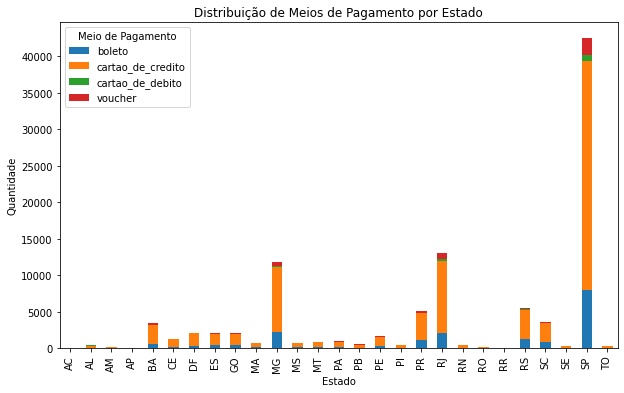

In [0]:
# Executando a consulta SQL
df = spark.sql("""
SELECT
  estadoCliente AS estados,
  meioDePagamento AS `meio de pagamento`,
  count(*) AS `percentual`
FROM
  delta.`dbfs:/FileStore/project/olist/gold/sales`
WHERE
  meioDePagamento IS NOT NULL
  AND YEAR(horaPedidoAprovado) IS NOT NULL
  AND statusDoPedido = "entregue"
GROUP BY
  estadoCliente,
  meioDePagamento
""")

# Convertendo para Pandas para facilitar a visualização
df_pandas = df.toPandas()

# Criar gráfico de barras empilhadas usando Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pivot_data = df_pandas.pivot_table(index='estados', columns='meio de pagamento', values='percentual')
pivot_data.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Distribuição de Meios de Pagamento por Estado')
plt.ylabel('Quantidade')
plt.xlabel('Estado')
plt.legend(title='Meio de Pagamento')
plt.show()


Média de Dias para Entrega por Estado

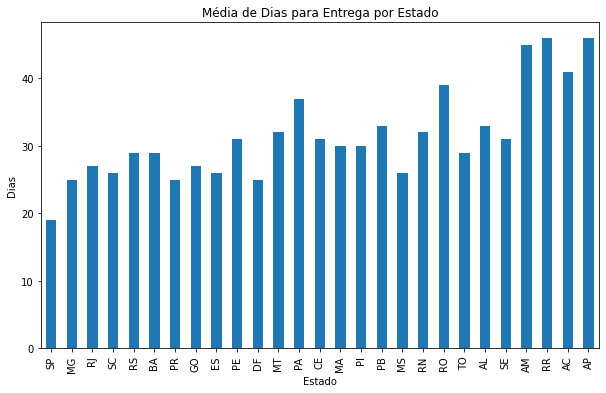

In [0]:
# Executando a consulta SQL
df = spark.sql("""
SELECT
  T.estadoCliente AS estados,
  T.diasEntrega AS `média de dias para entrega de produto`
FROM
  (
    SELECT
      estadoCliente,
      ROUND(AVG(dataEntregaEmDias), 0) AS DiasEntrega
    FROM
      delta.`dbfs:/FileStore/project/olist/gold/sales`
    WHERE
      meioDePagamento IS NOT NULL
      AND YEAR(horaPedidoAprovado) IS NOT NULL
      AND statusDoPedido <> "cancelado"
    GROUP BY
      estadoCliente
  ) AS T
""")

# Convertendo para Pandas para gerar o gráfico
df_pandas = df.toPandas()

# Criando gráfico de barras
df_pandas.plot(kind='bar', x='estados', y='média de dias para entrega de produto', legend=False, figsize=(10,6))

plt.title('Média de Dias para Entrega por Estado')
plt.ylabel('Dias')
plt.xlabel('Estado')
plt.show()


Número de Vendas por Estado em 2018

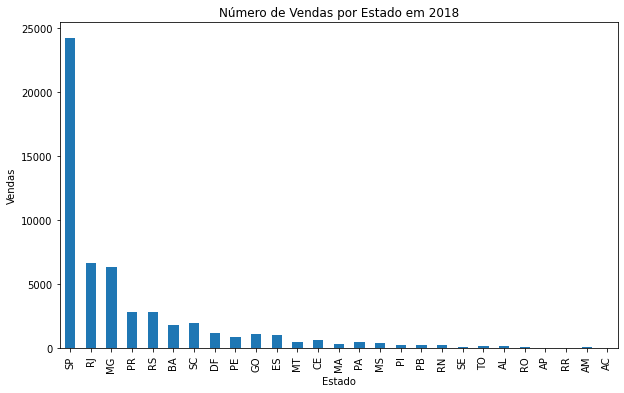

In [0]:
# Executando a consulta SQL
df = spark.sql("""
SELECT
  estadoCliente as `Estado`,
  Year(horaPedidoAprovado) as `Ano`,
  Count(*) as `Numero de Vendas`
FROM
  delta.`dbfs:/FileStore/project/olist/gold/sales`
WHERE
  statusDoPedido = "entregue"
AND
  Year(horaPedidoAprovado) = "2018"
GROUP BY
  Estado, Ano
""")

# Convertendo para Pandas
df_pandas = df.toPandas()

# Criando gráfico de barras
df_pandas.plot(kind='bar', x='Estado', y='Numero de Vendas', legend=False, figsize=(10,6))

plt.title('Número de Vendas por Estado em 2018')
plt.ylabel('Vendas')
plt.xlabel('Estado')
plt.show()


Ticket Médio Mensal em 2017

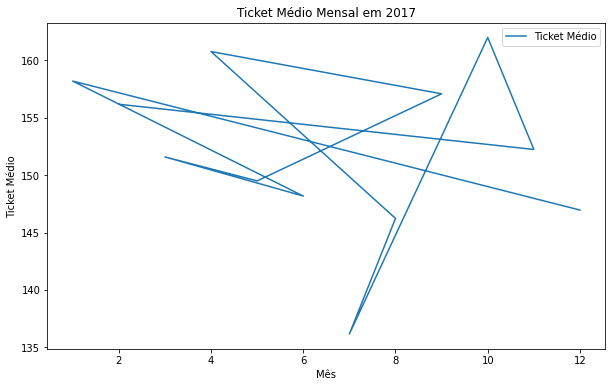

In [0]:
# Executando a consulta SQL
df = spark.sql("""
SELECT
  ROUND(SUM(valorPago)/Count(*), 2) as `Ticket Médio`,
  Month(horaPedidoAprovado) AS `Mês`
FROM
  delta.`dbfs:/FileStore/project/olist/gold/sales`
WHERE
  statusDoPedido = "entregue" AND Year(horaPedidoAprovado) = "2017"
GROUP BY
  Month(horaPedidoAprovado)
""")

# Convertendo para Pandas
df_pandas = df.toPandas()

# Criando gráfico de linhas
df_pandas.plot(kind='line', x='Mês', y='Ticket Médio', figsize=(10,6))

plt.title('Ticket Médio Mensal em 2017')
plt.ylabel('Ticket Médio')
plt.xlabel('Mês')
plt.show()
